### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in data

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Exploring Data

In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# observations: 1. there are no null values in any columns
#               2. first four columns have numeric values
#               3. last column is catagorical

In [6]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [7]:
# observations: 1. target column has 3 varieties (Setosa, Virginica, and Versicolor) of iris
#               2. each variety has 50 values

In [8]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


### Visualizations

#### Histograms

C:\Users\arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


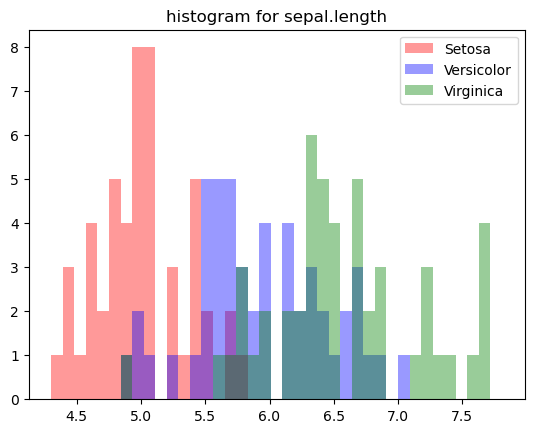

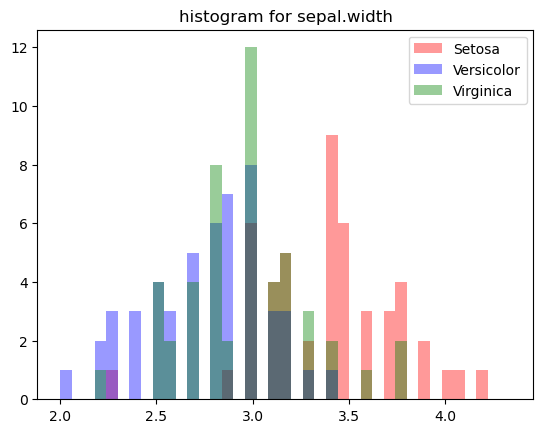

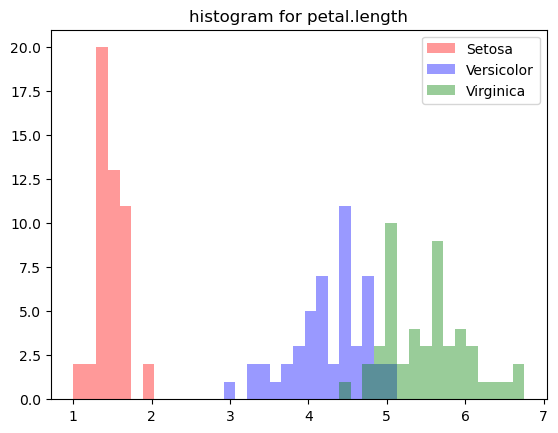

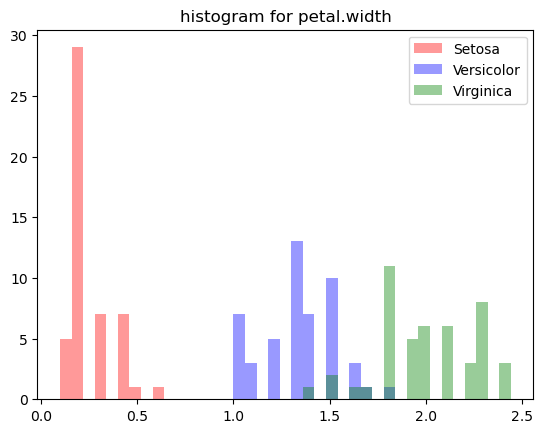

In [10]:
for i in ['sepal.length','sepal.width','petal.length','petal.width']:
    seto = list(iris[iris['variety'] == 'Setosa'][i])
    virgi = list(iris[iris['variety'] == 'Versicolor'][i])
    versi = list(iris[iris['variety'] == 'Virginica'][i])
    xmin = min(min(seto), min(virgi), min(versi))          
    xmax = max(max(seto), max(virgi), max(versi))
    width = (xmax - xmin) / 40 
    
    sns.distplot(seto, color='r', kde=False, bins=np.arange(xmin, xmax, width))           
    sns.distplot(virgi, color='b', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(versi, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Setosa', 'Versicolor', 'Virginica'])
    plt.title('histogram for {}'.format(i))
    plt.show()

In [11]:
# Setosa's petal length and petal width are separated from Virginica and Versicolor by good margin

### Encoding target variable

In [12]:
# convert target column to numeric
variety_num = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2 }
iris['variety'] = iris['variety'].map(variety_num)

In [13]:
iris.head() # checking by displaying first 5 values

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris.tail() # checking by displaying last 5 values

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Split data into train, validation, and test set : (ratio - 80:10:10)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris.drop('variety', axis = 1)
y = iris['variety']
# separated feature and target columns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# split dataset into train, validation and test set of ratio 80:10:10

In [17]:
for ex2 in [X_train, X_test, X_val]:
    print(len(ex2))

120
15
15


In [18]:
#Importing models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Evaluvating models using k-fold Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
svc = SVC()
svc_cvscore = cross_val_score(svc, X_train, y_train, cv=5)   

# 5 fold cross validation on training set for Support Vector Classifier

In [21]:
svc_cvscore

array([1.        , 0.95833333, 0.83333333, 1.        , 0.95833333])

In [22]:
rf = RandomForestClassifier()
rf_cvscore = cross_val_score(rf, X_train, y_train, cv=5)

# 5 fold cross validation on training set for Random Forest Classifier

In [23]:
rf_cvscore

array([0.95833333, 0.95833333, 0.79166667, 1.        , 0.95833333])

In [24]:
gb = GradientBoostingClassifier()
gb_cvscore = cross_val_score(gb, X_train, y_train, cv=5)

# 5 fold cross validation on training set for Gradient Boosting Classifier

In [25]:
gb_cvscore


array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.95833333])

#### On performing 5 fold cross validation on training set for above 3 algorithms, Support Vector Classifier outputs the best overall score.

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# function to print best hyperparameter values in arranged order
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [28]:
# tuning hyperparameter values for Support Vector Classifier using GridSearchCV
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

svc_cv = GridSearchCV(svc, parameters, cv=5)
svc_cv.fit(X_train, y_train)

print_results(svc_cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [29]:
svc_cv.best_estimator_

SVC(C=1, kernel='linear')

In [30]:
# tuning hyperparameter values for Random Forest Classifier
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train)

print_results(rf_cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 5}

0.925 (+/-0.153) for {'max_depth': 2, 'n_estimators': 5}
0.917 (+/-0.139) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.145) for {'max_depth': 2, 'n_estimators': 250}
0.958 (+/-0.091) for {'max_depth': 4, 'n_estimators': 5}
0.958 (+/-0.129) for {'max_depth': 4, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 250}
0.95 (+/-0.122) for {'max_depth': 8, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 8, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 16, 'n_estimators': 250}
0.933 (+/-0.155) for {'max_depth': 32, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 50}
0.942 (+/-0.155) for {'max_depth': 32, 'n_estimators': 250}
0.958 (+/-0.129) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.145) f

In [31]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=5)

In [32]:
# tuning hyperparameter values for  Gradient Boosting Classifier
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

gb_cv = GridSearchCV(gb, parameters, cv=5)
gb_cv.fit(X_train, y_train)

print_results(gb_cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.858 (+/-0.208) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.908 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.958 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.125) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate

In [33]:
gb_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

In [34]:
model_svc = svc_cv.best_estimator_
model_rf  = rf_cv.best_estimator_
model_gb   = gb_cv.best_estimator_  

# selected 3 best models after hyper parameter tuning and assigned them into three objects.

### Evaluating selected models on the validation set

In [35]:
# importing evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from time import time

In [36]:
# function to print accuracy, precision , recall, and latency
def evaluate_model( model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred  ), 3)
    precision = round(precision_score(labels, pred, average="micro" ), 3)
    recall = round(recall_score(labels, pred, average="micro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(model,
                                                                                       accuracy,
                                                                                       precision,
                                                                                       recall,
                                                                                       round((end - start)*1000, 4)))

In [37]:
evaluate_model( model_svc, X_val, y_val)

SVC(C=1, kernel='linear') -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.998ms


In [38]:
evaluate_model( model_rf, X_val, y_val)

RandomForestClassifier(max_depth=4, n_estimators=5) -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.9999ms


In [39]:
evaluate_model( model_gb, X_val, y_val)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250) -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.9855ms


#### All 3 models performed equally well on validation dataset with : Accuracy = 1.0 / Precision= 1.0 / Recall= 1.0 

### Evaluating selected model on test set

In [40]:
evaluate_model( model_gb, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250) -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.9948ms
